In [2]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Set style
sns.set(style="whitegrid", rc={"figure.figsize": (14, 6)})

# 2. Load datasets
oil_df = pd.read_csv("../data/raw/BrentOilPrices.csv", parse_dates=["Date"])
events_df = pd.read_csv("../data/raw/oil_market_events.csv", parse_dates=["date"])

# 3. Sort by date
oil_df = oil_df.sort_values("Date")
events_df = events_df.sort_values("date")

# 4. Quick look
print(oil_df.head())
print(events_df.head())


C:\Users\user\AppData\Local\Temp\ipykernel_20600\3296873011.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_df = pd.read_csv("../data/raw/BrentOilPrices.csv", parse_dates=["Date"])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
        date                           event                   type  \
0 1990-08-02             Iraq Invades Kuwait           Geopolitical   
1 1991-01-17  Start of Gulf War Air Campaign           Geopolitical   
2 1997-07-01          Asian Financial Crisis               Economic   
3 1999-03-23            OPEC Production Cuts          OPEC Decision   
4 2001-09-11          9/11 Terrorist Attacks  Geopolitical/Economic   

                                         description  
0  Triggered Gulf War and fears of supply shortag...  
1  Coalition air strikes eased supply fears; pric...  
2    Collapse in Asian demand sent oil prices lower.  
3   Coordinated supply cuts reversed falling prices.  
4  Increased uncertainty; short-term price volati...  


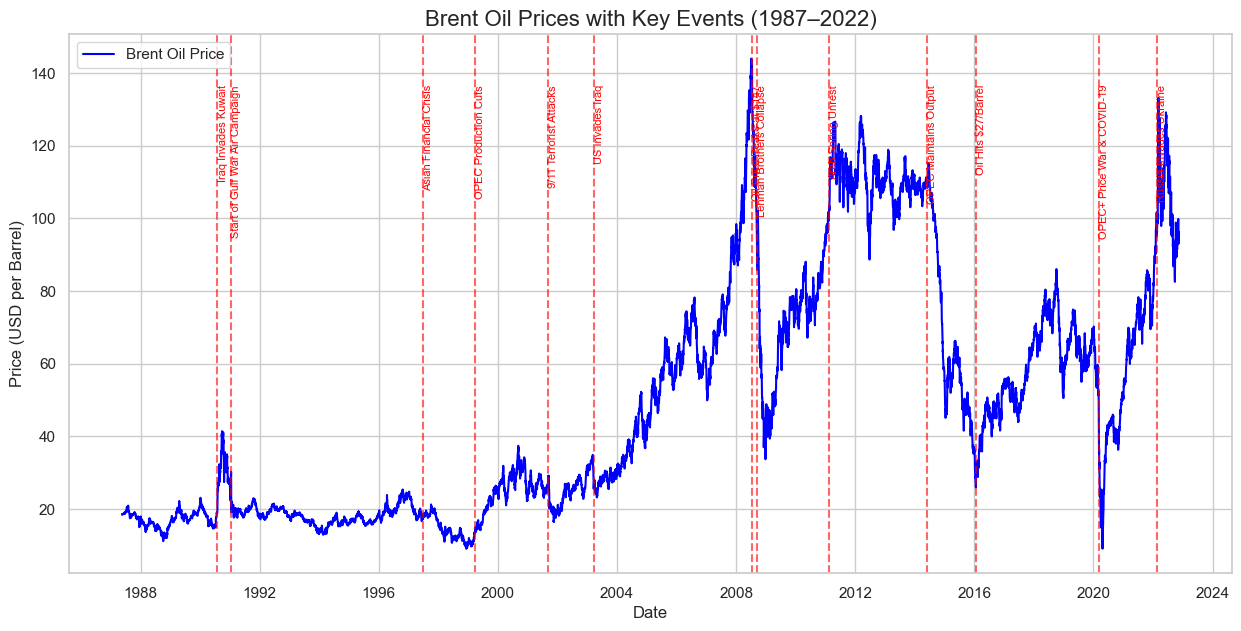

In [3]:
# 5. Plot Brent oil prices with event markers
plt.figure(figsize=(15, 7))
plt.plot(oil_df["Date"], oil_df["Price"], label="Brent Oil Price", color="blue")

# Annotate events
for _, row in events_df.iterrows():
    plt.axvline(row["date"], color="red", linestyle="--", alpha=0.6)
    plt.text(row["date"], 
             oil_df["Price"].max() * 0.95, 
             row["event"], 
             rotation=90, 
             fontsize=8, 
             verticalalignment="top", 
             color="red")

plt.title("Brent Oil Prices with Key Events (1987–2022)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USD per Barrel)")
plt.legend()
plt.show()


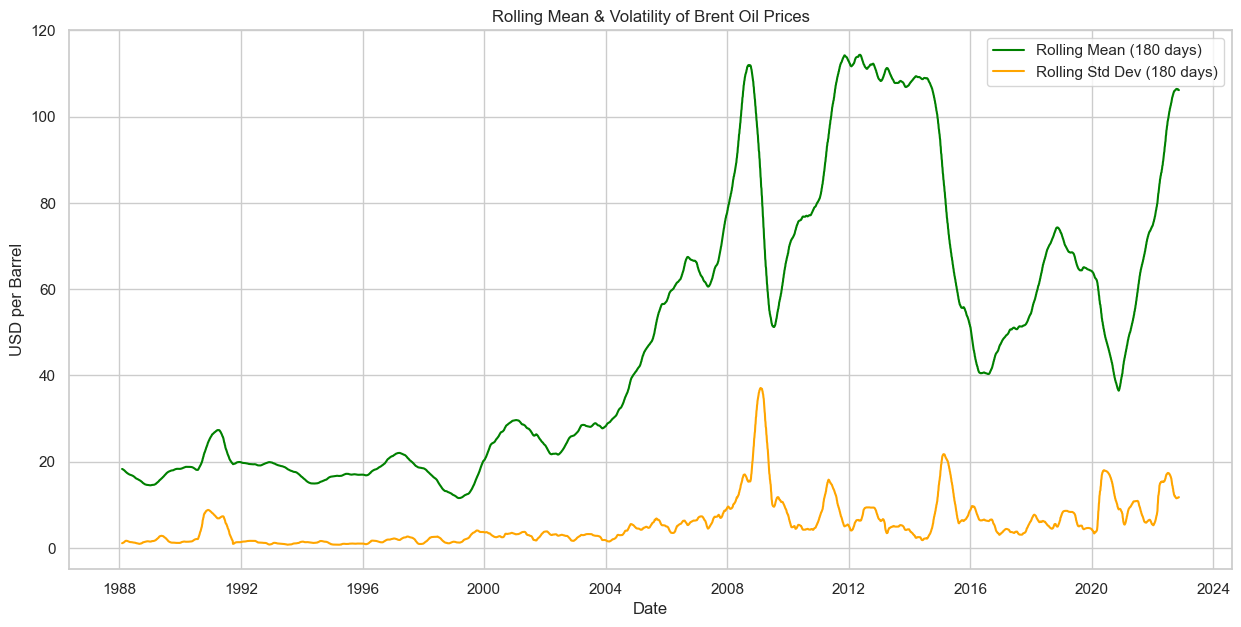

In [4]:
# 6. Rolling mean & volatility
oil_df["rolling_mean"] = oil_df["Price"].rolling(window=180).mean()
oil_df["rolling_std"] = oil_df["Price"].rolling(window=180).std()

fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.plot(oil_df["Date"], oil_df["rolling_mean"], label="Rolling Mean (180 days)", color="green")
ax1.plot(oil_df["Date"], oil_df["rolling_std"], label="Rolling Std Dev (180 days)", color="orange")
plt.title("Rolling Mean & Volatility of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.legend()
plt.show()

In [5]:
# 7. Stationarity test (ADF)
result = adfuller(oil_df["Price"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] <= 0.05:
    print("✅ Data is likely stationary (reject H0).")
else:
    print("⚠️ Data is likely non-stationary (fail to reject H0). Consider differencing.")

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values: {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}
⚠️ Data is likely non-stationary (fail to reject H0). Consider differencing.
